In [477]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import cpi
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVR
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [108]:
cpi.update()

In [50]:
df = pd.read_pickle("df.pkl")  

In [51]:
df.head()

,storm_id,duration,name,damage,date,wind,pressure,lat,long,rainfall,category,year,month,elevation
0,AL011959,5.50,Arlene,500000.0,1959-05-30,55.0,993.000000,29.650000,-91.600000,15.26,0,1959,5,0.299893
1,AL021993,3.25,Arlene,22000000.0,1993-06-20,35.0,1001.166667,27.116667,-97.466667,15.26,0,1993,6,2.473105
2,AL011962,6.75,Alma,1000000.0,1962-08-28,65.0,990.666667,34.526417,-76.099667,10.38,0,1962,8,-39.299995
3,AL011966,9.00,Alma,10050000.0,1966-06-09,80.0,979.666667,29.909800,-84.498200,10.38,1,1966,6,-0.304802
4,AL011968,12.25,Abby,450000.0,1968-06-04,57.0,992.000000,26.808383,-82.166817,14.65,0,1968,6,0.206002


In [52]:
df.dtypes

storm_id      object
duration     float64
name          object
damage       float64
date          object
wind         float64
pressure     float64
lat          float64
long         float64
rainfall     float64
category       int64
year           int64
month          int64
elevation    float64
dtype: object

In [53]:
df.shape

(237, 14)

In [124]:
inflated_damage = []
for index, row in df.iterrows():
    if row['year'] > 1913:
        inflated_damage.append(cpi.inflate(row['damage'], row['year']))
    else:
        inflated_damage.append(cpi.inflate(row['damage'], 1913))

inflated_damage[0:5]

[4655841.924398625,
 41254948.09688582,
 8972516.55629139,
 84050879.62962964,
 3503922.4137931042]

In [125]:
df['damage'] = inflated_damage

### Converting damage to billions 

In [147]:
df['damage'] = df['damage']/1000000000

In [148]:
df.head()

,storm_id,duration,name,damage,date,wind,pressure,lat,long,rainfall,category,year,month,elevation
0,AL011959,5.50,Arlene,0.004656,1959-05-30,55.0,993.000000,29.650000,-91.600000,15.26,0,1959,5,0.299893
1,AL021993,3.25,Arlene,0.041255,1993-06-20,35.0,1001.166667,27.116667,-97.466667,15.26,0,1993,6,2.473105
2,AL011962,6.75,Alma,0.008973,1962-08-28,65.0,990.666667,34.526417,-76.099667,10.38,0,1962,8,-39.299995
3,AL011966,9.00,Alma,0.084051,1966-06-09,80.0,979.666667,29.909800,-84.498200,10.38,1,1966,6,-0.304802
4,AL011968,12.25,Abby,0.003504,1968-06-04,57.0,992.000000,26.808383,-82.166817,14.65,0,1968,6,0.206002


In [193]:
df.pressure.fillna(df.pressure.mean(), inplace = True)

# Discriptive Analysis

## Visualizations

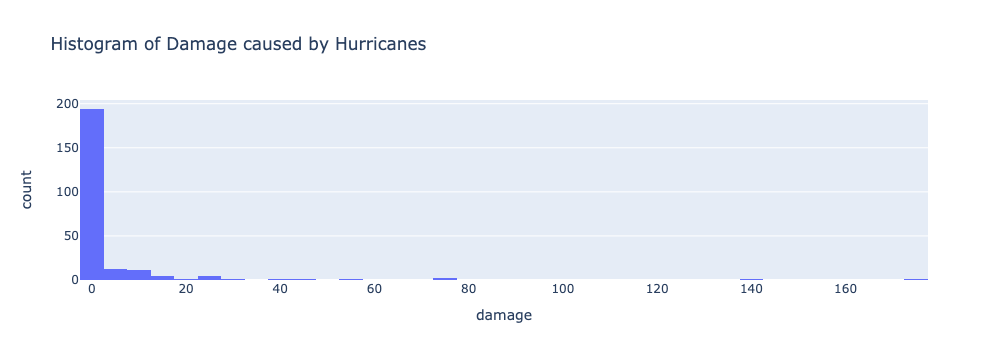

In [194]:
fig = px.histogram(df, x="damage", title = 'Histogram of Damage caused by Hurricanes')
fig.show()

#### Most hurricanes caused damage less than 5 Billon Dollars

In [195]:
df[df.damage > 100]

,storm_id,duration,name,damage,date,wind,pressure,lat,long,rainfall,category,year,month,elevation
131,AL092017,17.25,Harvey,138.182319,2017-08-26,115.0,946.166667,28.166667,-97.066667,60.58,3,2017,8,-2.100000
157,AL122005,7.50,Katrina,173.431900,2005-08-29,116.0,922.000000,29.384533,-89.602700,16.43,3,2005,8,0.670101


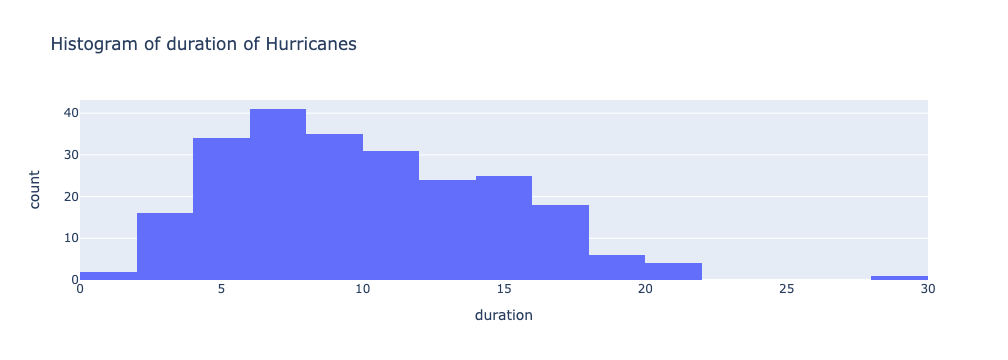

In [196]:
fig = px.histogram(df, x="duration", nbins = 20, title = 'Histogram of duration of Hurricanes')
fig.show()

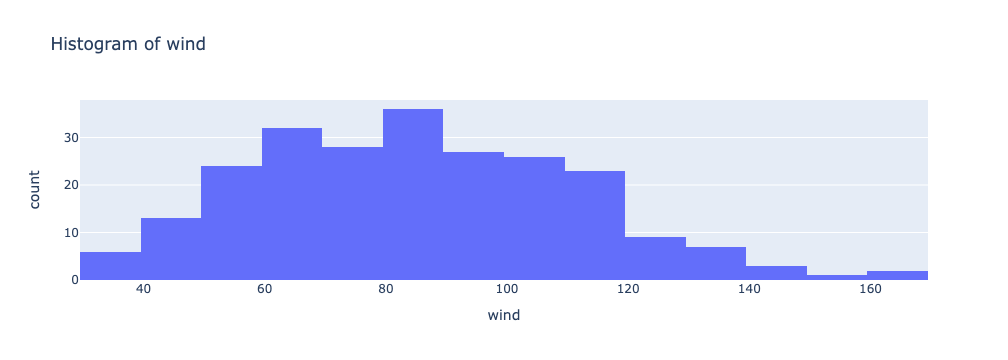

In [197]:
fig = px.histogram(df, x="wind", nbins = 20, title = 'Histogram of wind')
fig.show()

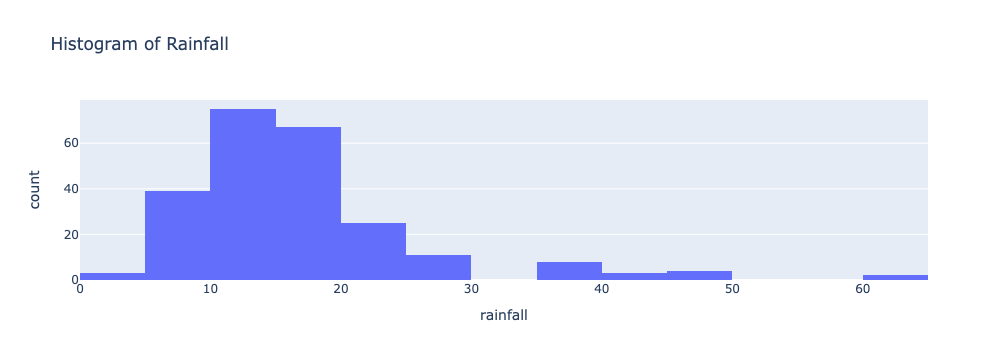

In [198]:
fig = px.histogram(df, x="rainfall", nbins = 20, title = 'Histogram of Rainfall')
fig.show()

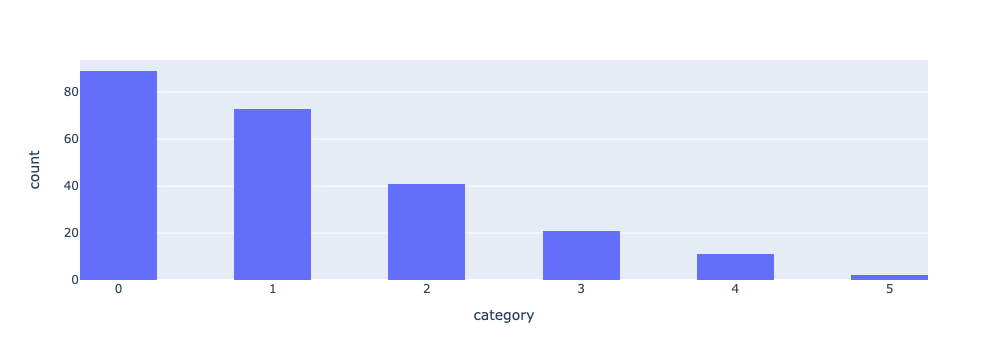

In [199]:
fig = px.histogram(df, x="category", nbins = 20)
fig.show()

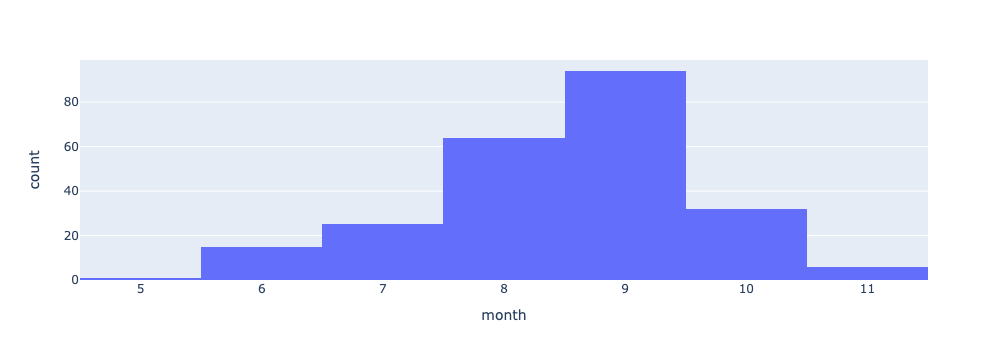

In [200]:
fig = px.histogram(df, x="month")
fig.show()

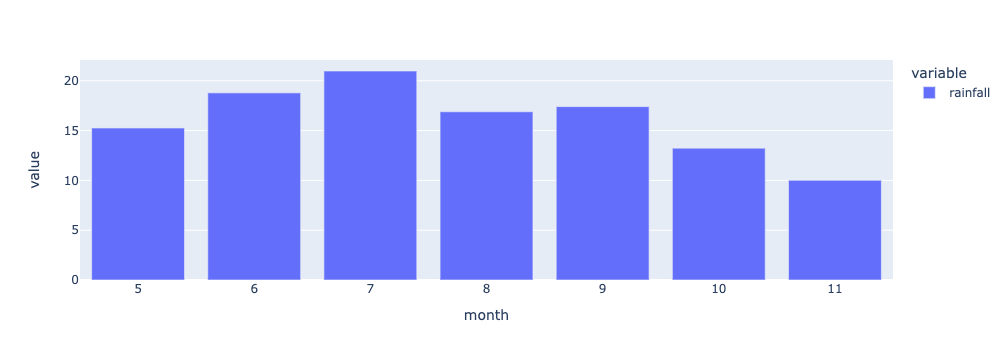

In [201]:
px.bar(df.groupby('month').rainfall.mean())

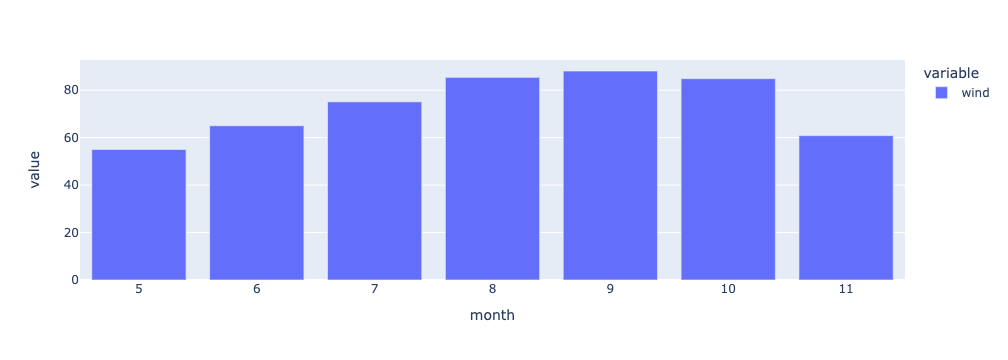

In [202]:
px.bar(df.groupby('month').wind.mean())

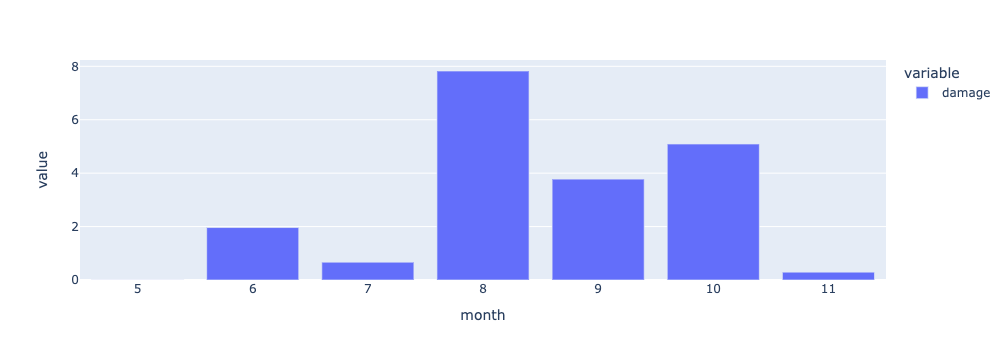

In [203]:
px.bar(df.groupby('month').damage.mean())

#### Hurricanes with most damage came in August, September and October

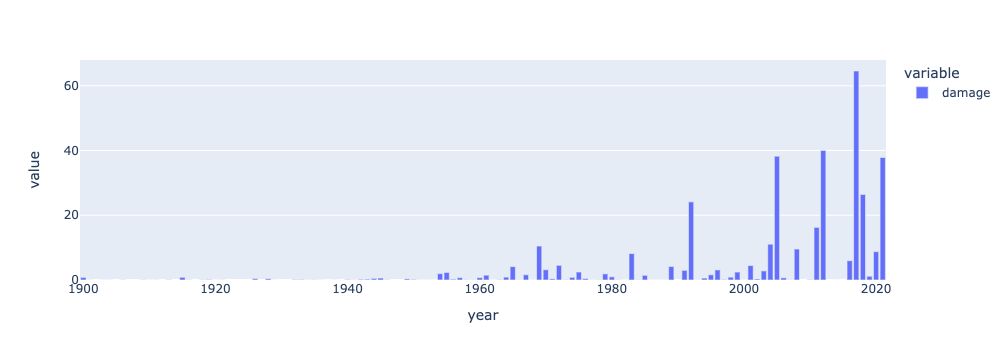

In [204]:
px.bar(df.groupby('year').damage.mean())

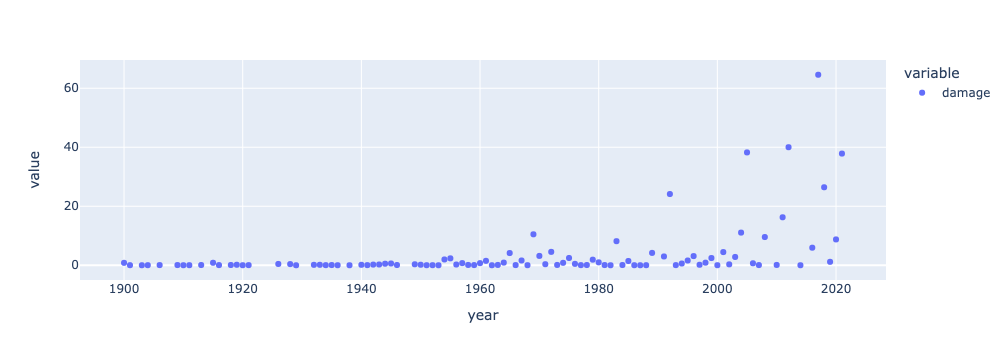

In [205]:
px.scatter(df.groupby('year').damage.mean())

### There seems an upward trend in damage caused by recent hurricanes.
### With time Hurricanes are causing more and more damage

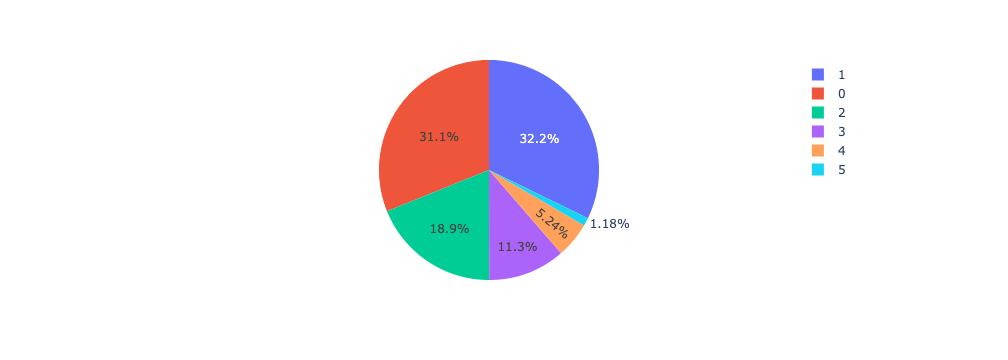

In [206]:
px.pie(df, values = 'duration', names = 'category')

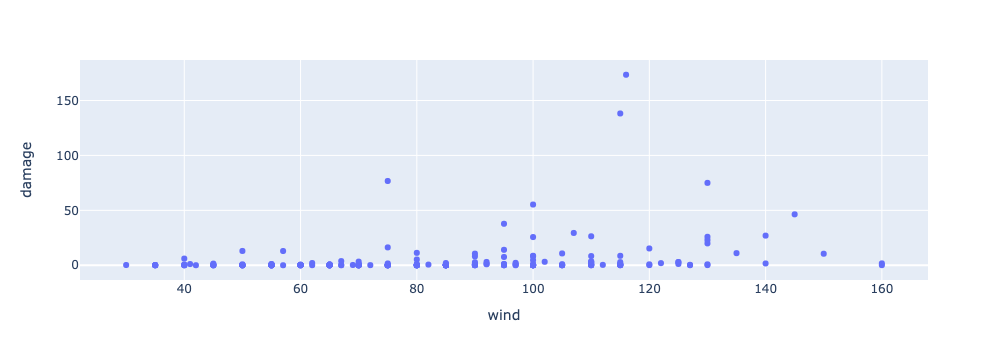

In [207]:
px.scatter(df, x = 'wind', y = 'damage')

## Correlation matrix

In [208]:
df.corr()

,duration,damage,wind,pressure,lat,long,rainfall,category,year,month,elevation
duration,1.000000,0.106091,0.319139,-0.350097,0.095879,0.064002,-0.000848,0.287631,-0.034679,0.245062,-0.043991
damage,0.106091,1.000000,0.251354,-0.334906,-0.037616,0.140198,0.181331,0.292208,0.272775,0.017128,0.065590
wind,0.319139,0.251354,1.000000,-0.927325,-0.190143,0.176831,-0.165434,0.942746,-0.213119,0.138827,-0.030196
pressure,-0.350097,-0.334906,-0.927325,1.000000,0.123540,-0.154897,0.160431,-0.878699,0.191422,-0.164169,0.043615
lat,0.095879,-0.037616,-0.190143,0.123540,1.000000,-0.049383,-0.110831,-0.251128,0.014821,-0.034646,0.167836
long,0.064002,0.140198,0.176831,-0.154897,-0.049383,1.000000,-0.044898,0.203214,0.297090,-0.022055,0.319667
rainfall,-0.000848,0.181331,-0.165434,0.160431,-0.110831,-0.044898,1.000000,-0.141709,0.309390,-0.193381,0.084393
category,0.287631,0.292208,0.942746,-0.878699,-0.251128,0.203214,-0.141709,1.000000,-0.192296,0.118606,-0.030267
year,-0.034679,0.272775,-0.213119,0.191422,0.014821,0.297090,0.309390,-0.192296,1.000000,-0.074298,0.074549
month,0.245062,0.017128,0.138827,-0.164169,-0.034646,-0.022055,-0.193381,0.118606,-0.074298,1.000000,-0.016742


<AxesSubplot:>

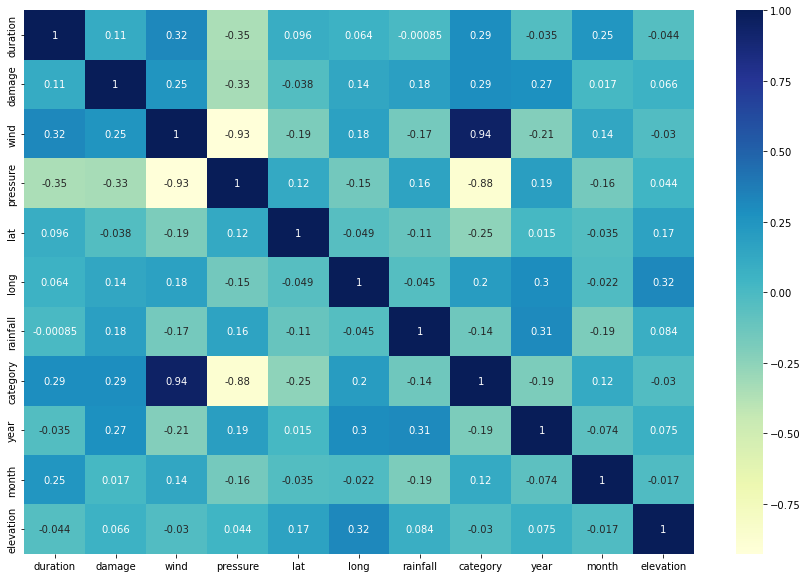

In [209]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#### Wind and pressure are highly negatively correlated
#### Wind and category are highly correlated which was expected

# Diagnostic Analytics

#### Most hurricanes caused damage less than 5 Billon Dollars
#### Most Hurricanes lasted from 4 to 10 days
#### There seems an upward trend in damage caused by recent hurricanes.
#### With time Hurricanes are causing more and more damage
#### Wind and pressure are highly negatively correlated
#### Wind and category are highly correlated which was expected
#### Hurricanes with most damage came in August, September and October

# Predictive Analytics

In [210]:
df.columns

Index(['storm_id', 'duration', 'name', 'damage', 'date', 'wind', 'pressure',
       'lat', 'long', 'rainfall', 'category', 'year', 'month', 'elevation'],
      dtype='object')

In [451]:
x = df[['duration', 'wind', 'pressure', 'lat', 'long', 'rainfall', 'elevation', 'category', 'month']]
y = df['damage']

In [452]:
x = pd.get_dummies(x, columns=['category'], drop_first = True )
x = pd.get_dummies(x, columns=['month'], drop_first = True )

In [453]:
x.head()

,duration,wind,pressure,lat,long,rainfall,elevation,category_1,category_2,category_3,category_4,category_5,month_6,month_7,month_8,month_9,month_10,month_11
0,5.50,55.0,993.000000,29.650000,-91.600000,15.26,0.299893,0,0,0,0,0,0,0,0,0,0,0
1,3.25,35.0,1001.166667,27.116667,-97.466667,15.26,2.473105,0,0,0,0,0,1,0,0,0,0,0
2,6.75,65.0,990.666667,34.526417,-76.099667,10.38,-39.299995,0,0,0,0,0,0,0,1,0,0,0
3,9.00,80.0,979.666667,29.909800,-84.498200,10.38,-0.304802,1,0,0,0,0,1,0,0,0,0,0
4,12.25,57.0,992.000000,26.808383,-82.166817,14.65,0.206002,0,0,0,0,0,1,0,0,0,0,0


## Modeling

In [440]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Linear Regression Model

In [441]:
lm = LinearRegression()
lm = lm.fit(x_train, y_train)

train_pred = lm.predict(x_train)
test_pred = lm.predict(x_test)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 15.771116054901524
Testing Root Mean Squared Error: 9.700397161961812


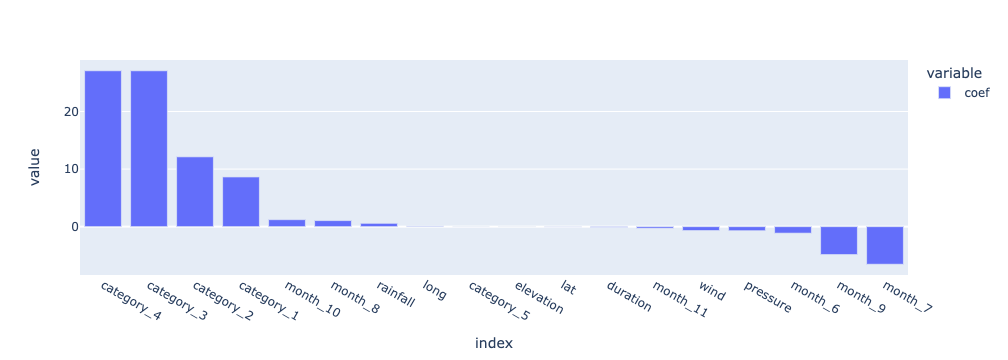

In [442]:
px.bar(pd.DataFrame(lm.coef_, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))

### Decision Tree

In [443]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

train_pred = dt.predict(x_train)
test_pred = dt.predict(x_test)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 0.0
Testing Root Mean Squared Error: 14.620672838500255


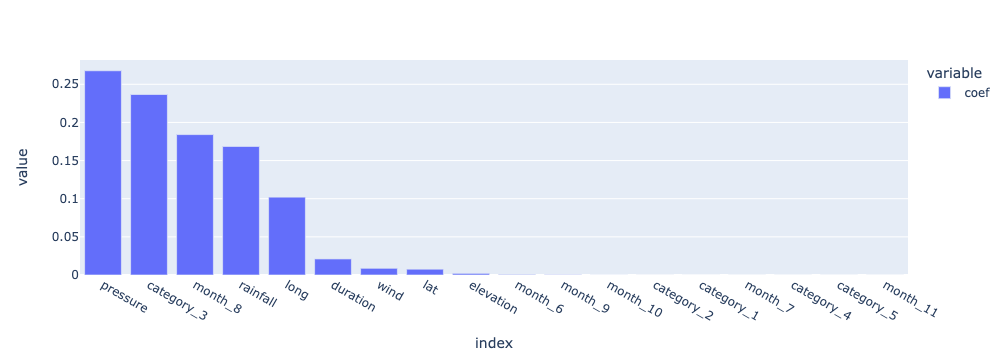

In [444]:
px.bar(pd.DataFrame(dt.feature_importances_, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))

### Random Forest

In [448]:
rf = RandomForestRegressor(n_estimators = 1000, n_jobs = -1)
rf.fit(x_train,y_train)

train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 7.178703271757828
Testing Root Mean Squared Error: 13.184184093622346


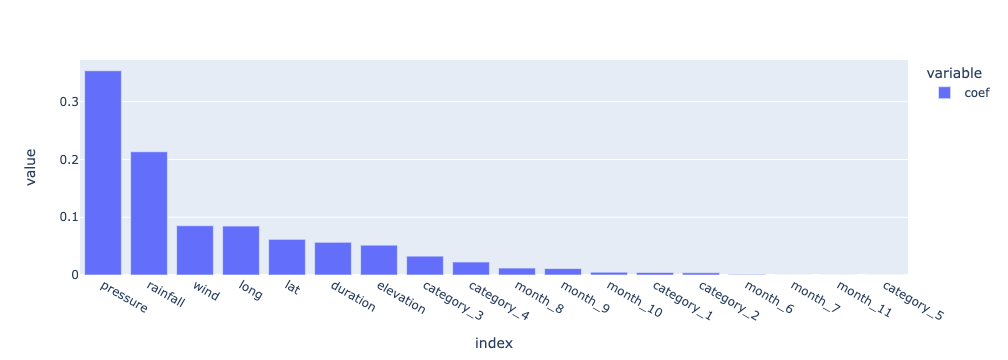

In [449]:
px.bar(pd.DataFrame(rf.feature_importances_, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))

# ANN

In [454]:
x_arr = np.array(x)
y_arr = np.array(y)

In [460]:
x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size = 0.2)

In [461]:
model = Sequential()
model.add(Dense(18, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [464]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [465]:
model.fit(x_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
5/5 [==============================] - 1s 51ms/step - loss: 420.5957 - mse: 420.5957 - val_loss: 19.6829 - val_mse: 19.6829
Epoch 2/50
5/5 [==============================] - 0s 31ms/step - loss: 420.5957 - mse: 420.5957 - val_loss: 19.6829 - val_mse: 19.6829
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 420.5957 - mse: 420.5957 - val_loss: 19.6829 - val_mse: 19.6829
Epoch 4/50
5/5 [==============================] - 0s 17ms/step - loss: 420.5957 - mse: 420.5957 - val_loss: 19.6829 - val_mse: 19.6829
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 420.5957 - mse: 420.5957 - val_loss: 19.6829 - val_mse: 19.6829
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 420.5958 - mse: 420.5958 - val_loss: 19.6829 - val_mse: 19.6829
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 420.5957 - mse: 420.5957 - val_loss: 19.6829 - val_mse: 19.6829
Epoch 8/50
5/5 [==============================] - 0s 14

In [466]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [467]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 18.438789129880238
Testing Root Mean Squared Error: 13.005093911986709


### SVM

In [470]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [501]:
svr = SVR(kernel = 'rbf')
svr.fit(x_train,y_train)

train_pred = svr.predict(x_train)
test_pred = svr.predict(x_test)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 18.851837928055378
Testing Root Mean Squared Error: 8.801208055688189


#### Scaling the Data

In [476]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()

In [507]:
x = df[['duration', 'wind', 'pressure', 'lat', 'long', 'rainfall', 'elevation', 'category', 'month']]
y = df['damage']

x = pd.get_dummies(x, columns=['category'], drop_first = True )
x = pd.get_dummies(x, columns=['month'], drop_first = True )

In [508]:
x.head()

,duration,wind,pressure,lat,long,rainfall,elevation,category_1,category_2,category_3,category_4,category_5,month_6,month_7,month_8,month_9,month_10,month_11
0,5.50,55.0,993.000000,29.650000,-91.600000,15.26,0.299893,0,0,0,0,0,0,0,0,0,0,0
1,3.25,35.0,1001.166667,27.116667,-97.466667,15.26,2.473105,0,0,0,0,0,1,0,0,0,0,0
2,6.75,65.0,990.666667,34.526417,-76.099667,10.38,-39.299995,0,0,0,0,0,0,0,1,0,0,0
3,9.00,80.0,979.666667,29.909800,-84.498200,10.38,-0.304802,1,0,0,0,0,1,0,0,0,0,0
4,12.25,57.0,992.000000,26.808383,-82.166817,14.65,0.206002,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
def scale():
    

In [478]:
x = pd.DataFrame(data = scaler.fit_transform(x), columns = x.columns )

In [479]:
x.head()

,duration,wind,pressure,lat,long,rainfall,elevation,category_1,category_2,category_3,category_4,category_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0.151786,0.192308,0.850046,0.510799,0.031282,0.205331,0.437844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.071429,0.038462,0.924266,0.428113,0.001197,0.205331,0.438071,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.196429,0.269231,0.828841,0.669959,0.110771,0.119762,0.433708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.276786,0.384615,0.728872,0.519278,0.067702,0.119762,0.437781,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.392857,0.207692,0.840958,0.418051,0.079657,0.194634,0.437834,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Adding category and month

In [416]:
x['category'] = df['category']
x['month'] = df['month']

In [417]:
x = pd.get_dummies(x, columns=['category'], drop_first = True )
x = pd.get_dummies(x, columns=['month'], drop_first = True )

In [418]:
x.head()

,duration,wind,pressure,lat,long,rainfall,elevation,category_1,category_2,category_3,category_4,category_5,month_6,month_7,month_8,month_9,month_10,month_11
0,-0.961930,-1.078795,1.007363,-0.077233,-0.380138,-0.190035,-0.021240,0,0,0,0,0,0,0,0,0,0,0
1,-1.442108,-1.842343,1.372821,-0.682621,-0.561944,-0.190035,-0.018216,0,0,0,0,0,1,0,0,0,0,0
2,-0.695165,-0.697020,0.902947,1.088078,0.100212,-0.731981,-0.076358,0,0,0,0,0,0,0,1,0,0,0
3,-0.214988,-0.124359,0.410698,-0.015149,-0.160056,-0.731981,-0.022082,1,0,0,0,0,1,0,0,0,0,0
4,0.478601,-1.002440,0.962613,-0.756291,-0.087807,-0.257778,-0.021371,0,0,0,0,0,1,0,0,0,0,0


#### Train Test Split

In [480]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Linear Regression Model

In [481]:
lm = LinearRegression()
lm = lm.fit(x_train, y_train)

In [482]:
train_pred = lm.predict(x_train)
test_pred = lm.predict(x_test)

In [483]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 15.550471414636618
Testing Root Mean Squared Error: 11.094355579481139


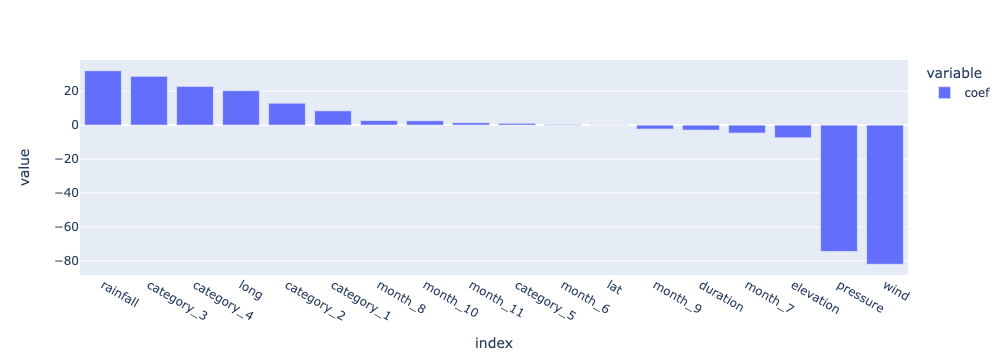

In [484]:
px.bar(pd.DataFrame(lm.coef_, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))

### Decision Tree

In [485]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

train_pred = dt.predict(x_train)
test_pred = dt.predict(x_test)

In [486]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 0.0
Testing Root Mean Squared Error: 35.28252627208331


In [487]:
dt.feature_importances_

array([1.43105461e-02, 9.66490217e-02, 2.08256281e-01, 2.40829149e-02,
       3.96159836e-01, 2.44219745e-01, 7.33396536e-03, 1.65279758e-05,
       2.37794964e-08, 1.24881712e-03, 1.31058429e-05, 0.00000000e+00,
       1.98323194e-11, 7.68474425e-06, 4.52290186e-04, 1.30309838e-07,
       7.24669367e-03, 2.41663122e-06])

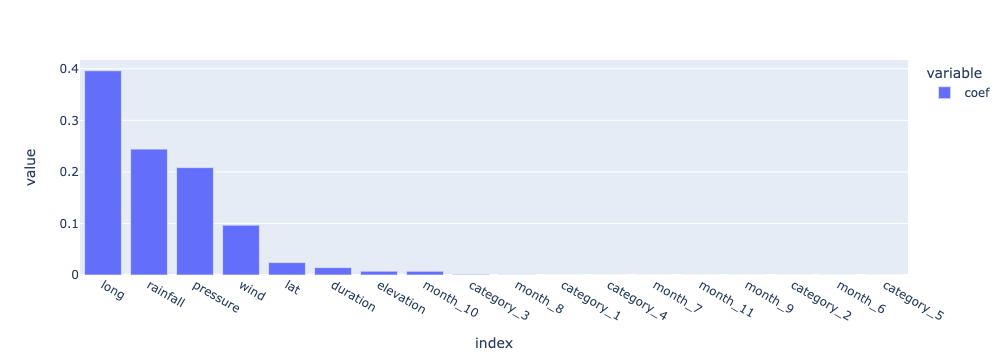

In [488]:
px.bar(pd.DataFrame(dt.feature_importances_, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))

### Random Forest

In [489]:
rf = RandomForestRegressor(n_estimators = 200, n_jobs = -1, verbose = 1)
rf.fit(x_train,y_train)

train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [490]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 7.328957016039897
Testing Root Mean Squared Error: 9.693324076464169


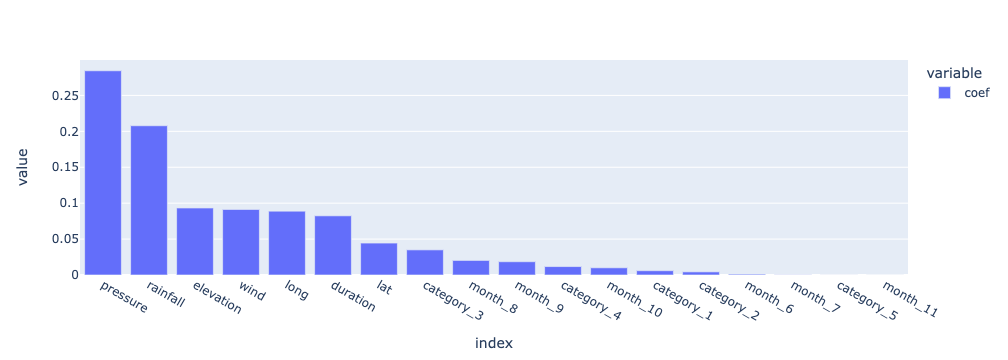

In [491]:
px.bar(pd.DataFrame(rf.feature_importances_, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False))

# ANN

In [492]:
x = np.array(x)
y = np.array(y)


In [493]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [494]:
model = Sequential()
model.add(Dense(18, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [495]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [496]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
6/6 [==============================] - 1s 4ms/step - loss: 366.5195 - mse: 366.5195 - mae: 4.8984
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 366.2393 - mse: 366.2393 - mae: 4.9018
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 366.0830 - mse: 366.0830 - mae: 4.9058
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 365.8419 - mse: 365.8419 - mae: 4.9099
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 365.6175 - mse: 365.6175 - mae: 4.9150
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 365.3839 - mse: 365.3839 - mae: 4.9184
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 365.1803 - mse: 365.1803 - mae: 4.9246
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 364.9030 - mse: 364.9030 - mae: 4.9313
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 364.6770 - mse: 364.6770 - mae: 4.9386
Epoch 10/50
6/6 [==

In [497]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [498]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 19.03110329789737
Testing Root Mean Squared Error: 8.876347713026878


# Prescriptive Analysis